In [26]:
# This section will go over Boolean masks to examine/manipulate values within NumPy arrays
# Masking is used when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion
# Ex. Imagine you have a series of data that represents amount of percipitation each day for a year for a given city
# We will load daily rainfall stats for Seattle in 2014 using Pandas (which will be covered later on)
import numpy as np
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365L,)

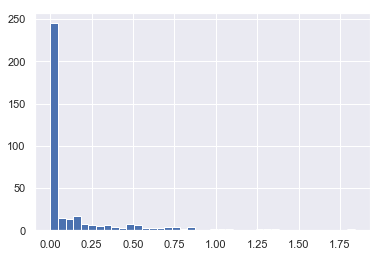

In [27]:
# So we see that the array contains 365 values through the shape function
# As a 1st quick glance, lets look at a histogram of rainy days generated by matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(inches, 40);

In [ ]:
# The histogram gives us a general idea of what the data looks like
# Despite Seattle's reputation, the vast majority of days saw near 0 measured rainfall
# However, this doesnt do a good job of conveying some information we might need
# Ex. How many rainy days were there? Average percipitation of those rainy days?
# One approach of answering these questions would be by hand:
# Loop through the data, incrementing counter each time we see values in some desired range
# For reasons discussed in previous sections, this is a very inefficient approach
# We saw in ufuncs section that NumPy's ufuncs can replace loops to do fast element-wise arithmetic operations on arrays
# Similarily, we can use ufuncs to do element-wise comparisions over arrays and manipulate results to get our answers
# We will leave the data aside for now and talk about some general NumPy tools for masking and quickly anser these questions

In [3]:
# We have already seen +, -, /, * as arithmetic ufunc operators
# We can also use NumPy's < (less than) and > (greater than) comparison operators
# The result of these operations is always an array with a Boolean data type
# All 6 standard comparison operators are available
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [4]:
x > 3

array([False, False, False,  True,  True])

In [5]:
x <= 3

array([ True,  True,  True, False, False])

In [6]:
x >= 3

array([False, False,  True,  True,  True])

In [8]:
x != 3

array([ True,  True, False,  True,  True])

In [9]:
x == 3

array([False, False,  True, False, False])

In [10]:
# Also possible to do element-by-element comparison of 2 arrays 
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [11]:
# As in the case of arithmetic operators, comparison operators are also implemented as ufuncs in NumPy
# Ex. np.less(x, 3) is internally used when you write x < 3
# As with the case of arithmetic ufuncs, these will work on arrays of any size and shape
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [12]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [13]:
# Given a boolean array, you can use a bunch of useful operations
# Lets work with x
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [14]:
# To count the number of TRUE entries in a Boolean array, np.coun_nonzero is useful
# Ex. How many values less than 6?
np.count_nonzero(x < 6)

8

In [15]:
# There are 8 entries less than 6
# Another way to get this answer is to use np.sum
# False is interpreted as 0 and True is interpreted as 1
np.sum(x < 6)

8

In [16]:
# Benefit of sum() is that like with other NumPy aggregation functions, summation can be done along rows and columns as well
# Ex. How many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [17]:
# If interested in quickly checking whether any or all values are true, we can use np.any() or np.all()
# Ex. Any values greater than 8?
np.any(x > 8)

True

In [18]:
# Any values less than 0?
np.any(x < 0)

False

In [19]:
# All values less than 10?
np.all(x < 10)

True

In [20]:
# All values equal to 6?
np.all(x == 6)

False

In [21]:
# All values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

In [ ]:
# IMPORTANT NOTE:
# Python has built-in sum(), any(), and all() functions
# These have different syntax than the NumPy versions and will fail or produce unintended results when used on multi-D arrays
# Make sure to use np.sum(), np.any(), np.all() for these examples

In [28]:
# Already know how to count days with less rain less than four inches
# What if want to know about all days with rain less than four inches and greater than 1 inch?
# We can do this with python's bitwise logic operators &, |, ^, and ~
# Like with standard arithmetic operators, NumPy overloads these as ufuncs that work element-wise on Boolean arrays
# We can address the question asked earlier like this:
np.sum((inches > 0.5) & (inches < 1))

29

In [35]:
# So we see here that there are 29 days with rainfall between 0.5 and 1.0 inches
# Using these toold we can answer types of questions we have about our weather data
print("Number of days without rain:            ", np.sum(inches == 0))
print("Number of days with rain:               ", np.sum(inches != 0))
print("Days with more than 0.5 inches:         ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches:           ", np.sum((inches != 0) & (inches < 0.1)))

('Number of days without rain:            ', 215)
('Number of days with rain:               ', 150)
('Days with more than 0.5 inches:         ', 37)
('Rainy days with < 0.1 inches:           ', 46)


In [36]:
# Previously, we looked at aggregates computed directly on Boolean arrays
# More powerful pattern is to use Boolean arrays as masks to select subsets of data themselves
# Returning to x array from before, lets say we want an array of all values in the array that are less than 5
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [37]:
# We can obtain a Boolean array for this condition easily
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [38]:
# To SELECT these values from the array, we can simply index on this Boolean array
# This is known as a masking operation
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [53]:
# What is returned is a 1D array with all the values that meet this condition
# We are then free to operate on these values as we wish
# Ex. we can compute some relevant statistics on our Seattle rain data

# Lets construct a mask of all rainy days
rainy = (inches > 0)
# So now we have a Boolean array of all days in 2014 when it was rainy 

# Lets construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
# We now have a Boolean array of all days that are Summer

print("Median precip on rainy days in 2014 (inches):     ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):    ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):   ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches:)  ", np.median(inches[rainy & ~summer]))

('Median precip on rainy days in 2014 (inches):     ', 0.19488188976377951)
('Median precip on summer days in 2014 (inches):    ', 0.0)
('Maximum precip on summer days in 2014 (inches):   ', 0.8503937007874016)
('Median precip on non-summer rainy days (inches:)  ', 0.20078740157480315)


In [ ]:
# NOTE: When we write inches[rainy], we are using a masking operation
# We select values form the inches array that satisfy the boolean expression by indexing using rainy

In [ ]:
# NOTE: 'and' and 'or' perform a single Boolean evaluation on an entire object
# $ and | perform multiple Boolean evaluations on the content (individual bits or bytes) of an object
# For Boolean NumPy arrays, the latter is nearly always the desired operation